In [1]:
from sympy import dsolve, Eq, symbols, Function, lambdify,solve, init_printing, pprint, latex
from sympy.plotting import plot
from scipy.integrate import solve_ivp
import numpy as np
from matplotlib import pyplot as plt


Let's try this problem:
$$\frac{d x(t)}{d t} = 1-x(t)$$

In [2]:
#Declare sympy symbols
t = symbols('t')
x = symbols('x', cls=Function)


In [53]:
#define the problem
deqn1 = Eq(x(t).diff(t), x(t)**(1/3))
#and check

deqn1


Eq(Derivative(x(t), t), x(t)**0.333333333333333)

In [61]:
# Solve the problem with sympy using initial conditions:
ics={x(0):0} 

sol1 = dsolve(deqn1, x(t))#,ics=ics)

#Print the solution
print('the solution is with initial conditions', ics, ' is:')
sol1[1]

the solution is with initial conditions {x(0): 0}  is:


Eq(x(t), 2*sqrt(6)*(C1 + t)**(3/2)/9)

In [60]:
sol1[1].subs(t,0)

Eq(x(0), 2*sqrt(6)*C1**(3/2)/9)

In [55]:
C1=symbols('C1')
X0=symbols('X0')
C=solve(sol1.subs(t,0).subs(x(0),1),C1)[0]
C

AttributeError: 'list' object has no attribute 'subs'

In [48]:
sol1.subs(C1,C)

Eq(x(t), 1)

In [31]:
deqn1.rhs

1 - x(t)

In [66]:
f=sol1[0].subs(C1,1).rhs

In [67]:
g=lambdify(t,f,'numpy')

In [68]:
g(1.1)

-1.6565023392678924

In [69]:
tval=np.linspace(0,4)
tval

array([0.        , 0.08163265, 0.16326531, 0.24489796, 0.32653061,
       0.40816327, 0.48979592, 0.57142857, 0.65306122, 0.73469388,
       0.81632653, 0.89795918, 0.97959184, 1.06122449, 1.14285714,
       1.2244898 , 1.30612245, 1.3877551 , 1.46938776, 1.55102041,
       1.63265306, 1.71428571, 1.79591837, 1.87755102, 1.95918367,
       2.04081633, 2.12244898, 2.20408163, 2.28571429, 2.36734694,
       2.44897959, 2.53061224, 2.6122449 , 2.69387755, 2.7755102 ,
       2.85714286, 2.93877551, 3.02040816, 3.10204082, 3.18367347,
       3.26530612, 3.34693878, 3.42857143, 3.51020408, 3.59183673,
       3.67346939, 3.75510204, 3.83673469, 3.91836735, 4.        ])

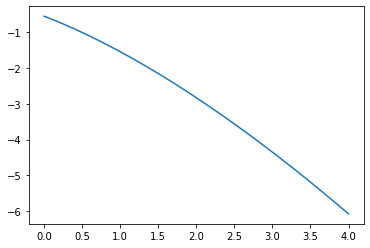

In [70]:
plt.plot(tval,g(tval))